In [4]:
# Enter an exisiting simulation name
# Existing simulations have already been generated through the Ocean Plastic Assimilator
# They produced a "data/data_SIM_NAME/" directory at the root of this repository

sim_name = "mu_2_A_0.1175_eps_0.25_sigma_rel_0.01"
data_folder = f"../data/data_{sim_name}"

ds_parts_ensembles_path = f"{data_folder}/parts_ensemble_{sim_name}.nc"
ds_densities_ref_path = f"{data_folder}/densities_ref_{sim_name}.nc"
ds_densities_ensemble_path = f"{data_folder}/densities_ensemble_{sim_name}.nc"

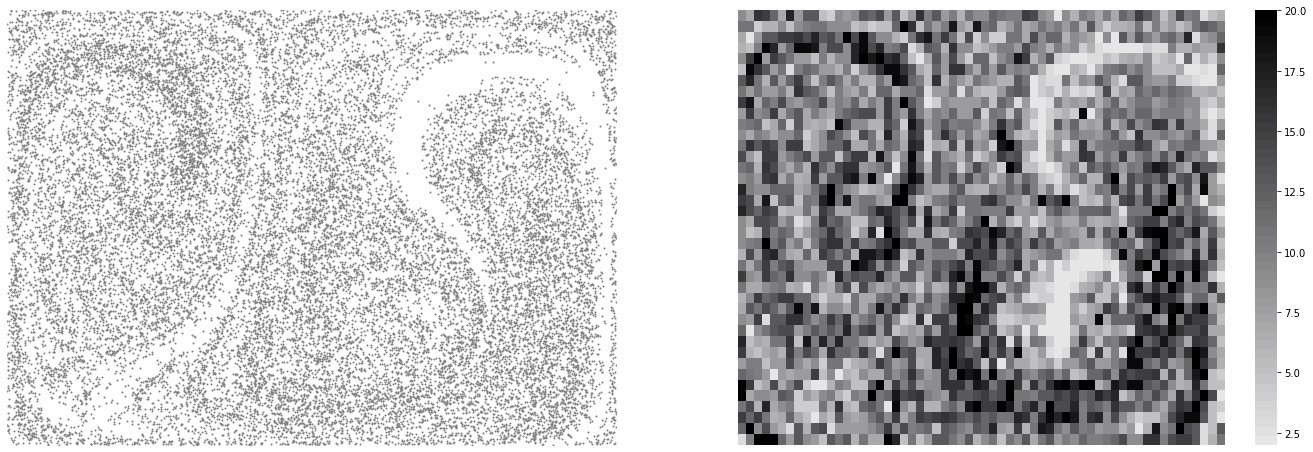

In [5]:
import netCDF4 as nc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

t=0
ds_parts = nc.Dataset(ds_parts_ensembles_path)
ds_densities = nc.Dataset(ds_densities_ref_path)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

ax1.scatter((ds_parts['lon'][:,t] - 195) / 30, (ds_parts['lat'][:,t] - 20) / 20, c="grey", s=1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim((0,1))
ax1.set_ylim((0,1))
ax1.set_axis_off()

sns.heatmap(np.flip(ds_densities['density'][:,:,t].T, axis=0), robust=True, ax=ax2, cmap=sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0))
ax2.set_xticks([])
ax2.set_yticks([])

fig.savefig("figure_2.png")

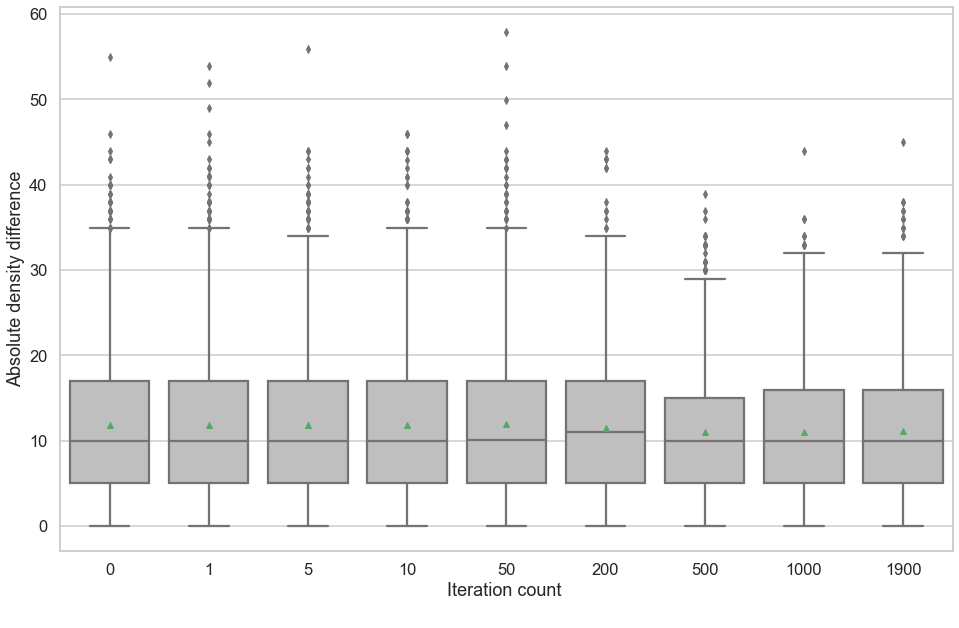

In [6]:
import seaborn as sns
import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt

tStart = 0
tEnd = 1900

ds_densities_ensemble = nc.Dataset(ds_densities_ensemble_path, "r")
densities_ensemble = ds_densities_ensemble["density"][:, :, :, tStart: tStart + tEnd + 1]
ds_densities_ensemble.close()

avgs_densities = np.average(densities_ensemble[:,:,:,np.arange(tEnd + 1)], axis=0)

ds_densities_ref = nc.Dataset(ds_densities_ref_path)
densities_ref = ds_densities_ref["density"][:,:,:]

densities_difference_to_ref = avgs_densities - densities_ref[:, :, tStart: tStart + tEnd + 1]
densities_difference_to_ref_abs = np.abs(densities_difference_to_ref)

selectedTimeSteps = [0,1,5,10,50,200,500,1000,1900]

data = pd.DataFrame()
for k in selectedTimeSteps:
    data[k] = densities_difference_to_ref_abs[:,:,k].flatten()

# Plot

sns.set(style="whitegrid")
sns.set_context("talk")
fig = plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=data[selectedTimeSteps], color="0.75", showmeans=True)
ax.set(xlabel="Iteration count \n", ylabel="Absolute density difference")
fig.savefig("figure_4.png")